In [1]:
%matplotlib inline
from kid_readout.measurement.io import nc
from kid_readout.measurement import basic, plot_basic

In [2]:
ncf = nc.NCFile('/data/readout/2016-12-01_160550_cw_sweep_hwp_step_000.nc')

In [3]:
print(ncf.metadata.script_code)

from kid_readout.interactive import *
from kid_readout.measurement import mmw_source_sweep, core

from equipment.custom import mmwave_source
from equipment.hittite import signal_generator
from equipment.srs import lockin
from xystage import stepper

import time

acquire.get_script_logger('')

hittite = signal_generator.Hittite(ipaddr='192.168.0.200')
hittite.set_power(0)
hittite.on()
lockin = lockin.Lockin(LOCKIN_SERIAL_PORT)
tic = time.time()
print lockin.identification
print lockin.identification
#lockin.sensitivity = 21 #21 --> 20 mV
# print time.time()-tic
# tic = time.time()
# print lockin.state(measurement_only=True)
# print time.time()-tic
source = mmwave_source.MMWaveSource()
source.set_attenuator_turns(6.0,6.0)
source.multiplier_input = 'hittite'
source.waveguide_twist_angle = 0
source.ttl_modulation_source = 'roach'


hwp_motor = stepper.SimpleStepper(port='/dev/ttyACM2')

setup = hardware.Hardware(hwp_motor, source, lockin,hittite)


ri = hardware_tools.r2_with_mk1()

initia

In [4]:
ncf.node_names()

[u'MMWSweepList0']

In [5]:
mmwsl = ncf.read('MMWSweepList0')

In [6]:
# The number of resonators
mmwsl.sweep.num_channels

64

In [7]:
# The number of MMW source frequencies
len(mmwsl.stream_list)

128

In [55]:
good = [10, 12, 13, 14, 16]

In [86]:
sssl = mmwsl[16]
sss = basic.SingleSweepStream(sweep=sssl.single_sweep, stream=sssl.stream_list[40])

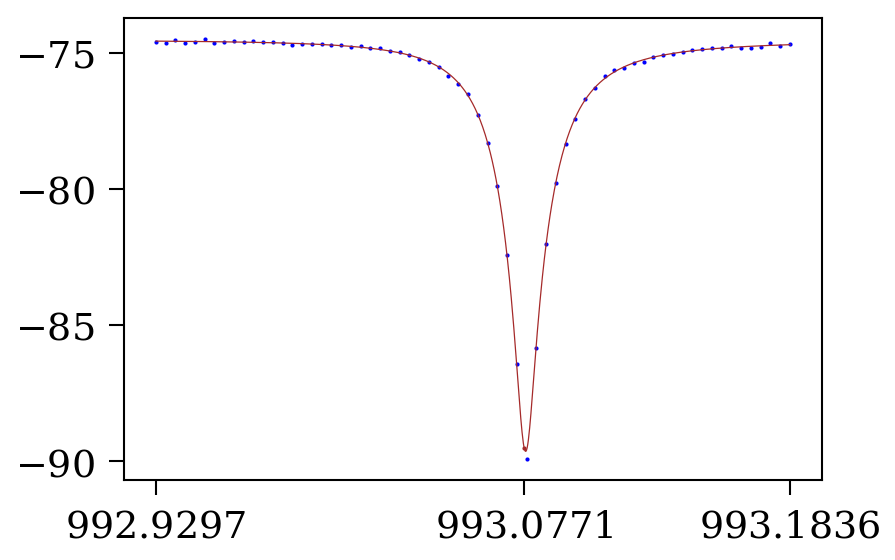

In [87]:
fig, ax = plt.subplots()
plot_basic.resonator_amplitude(resonator=sss.resonator, axis=ax, normalize=False);

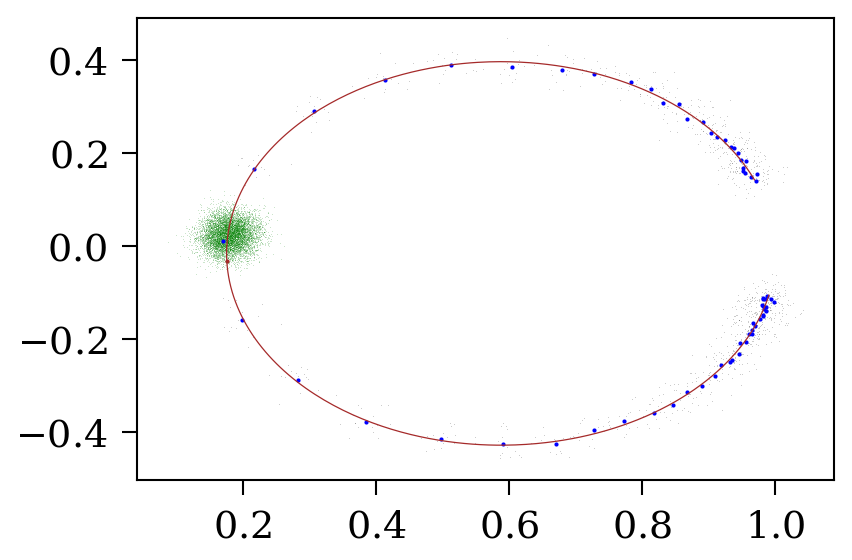

In [88]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss=sss, axis=ax, normalize=True)

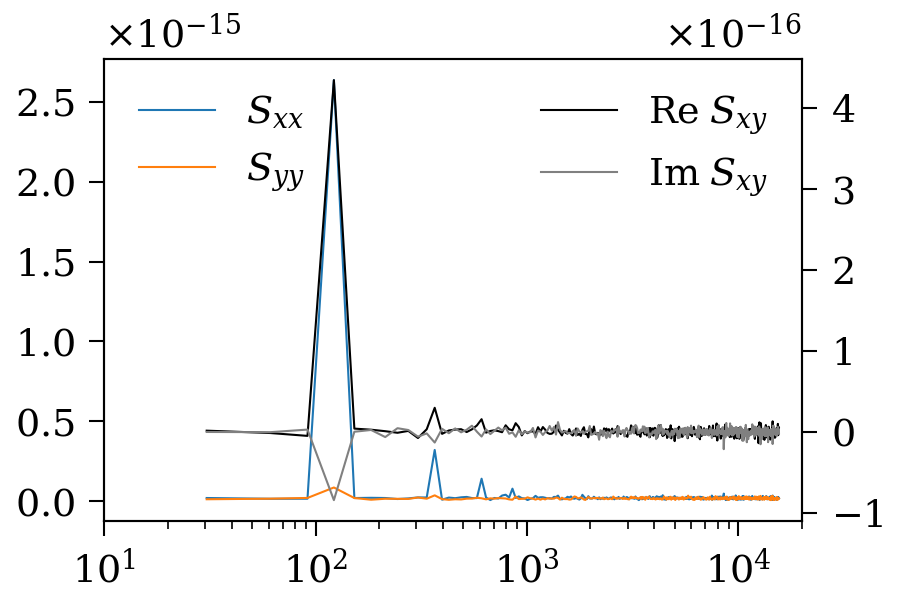

In [92]:
sss.set_S(binned=False)
fig, ax = plt.subplots()
cross_ax = ax.twinx()
ax.set_xscale('log')
#ax.set_yscale('log')
#cross_ax.set_yscale('symlog')
ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}$')
cross_ax.plot(sss.S_frequency, np.real(sss.S_xy), label='$\mathrm{Re} \; S_{xy}$', color='black')
cross_ax.plot(sss.S_frequency, np.imag(sss.S_xy), label='$\mathrm{Im} \; S_{xy}$', color='gray')
ax.legend(loc='upper left')
cross_ax.legend(loc='upper right')
ax.set_xlim(1e1, 2e4);


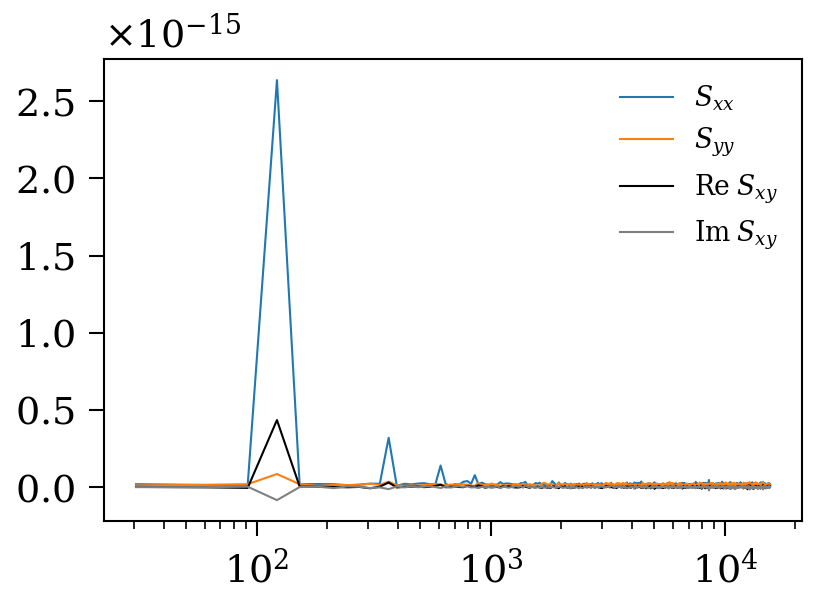

In [95]:
sss.set_S(binned=False)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}$')
ax.plot(sss.S_frequency, np.real(sss.S_xy), label='$\mathrm{Re} \; S_{xy}$', color='black')
ax.plot(sss.S_frequency, np.imag(sss.S_xy), label='$\mathrm{Im} \; S_{xy}$', color='gray')
ax.legend(fontsize='xx-small')
